<a href="https://colab.research.google.com/github/bob-michael-prodmgmt/sandbox/blob/main/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [162]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [163]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_text


## Loading the dataset

In [164]:
# Ensure that Google Drive is mounted properly
from google.colab import drive
drive.mount('/content/drive')



# Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/Loan_Modelling.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [165]:
# Data Overview
print("First 5 rows of the dataset:\n", data.head())
print("\nDataset Information:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

First 5 rows of the dataset:
    ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeInd

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

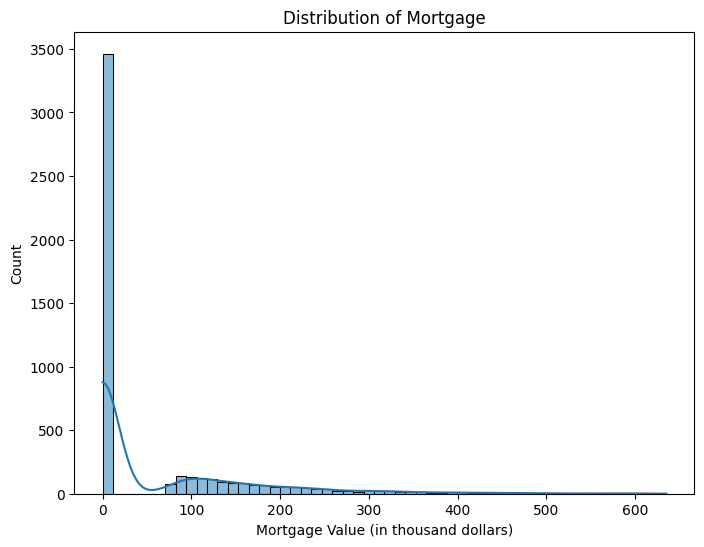

In [166]:
# Exploratory Data Analysis (EDA)
# Question 1: Distribution of Mortgage attribute
plt.figure(figsize=(8, 6))
sns.histplot(data['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.show()


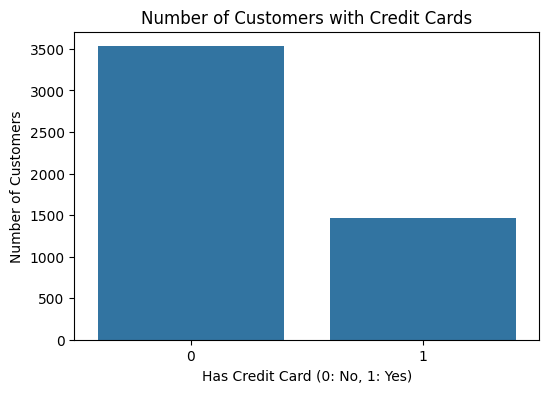

In [167]:
# Question 2: How many customers have credit cards?
credit_card_users = data['CreditCard'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=credit_card_users.index, y=credit_card_users.values)
plt.title('Number of Customers with Credit Cards')
plt.xlabel('Has Credit Card (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

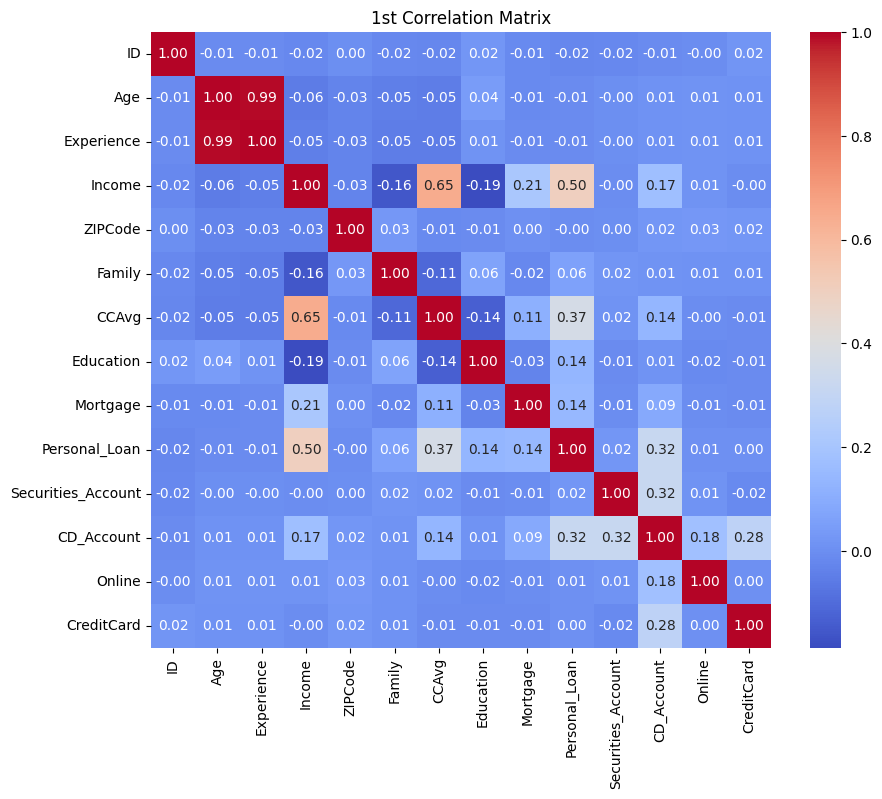

In [168]:
# Question 3: Correlation with Personal Loan
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('1st Correlation Matrix')
plt.show()

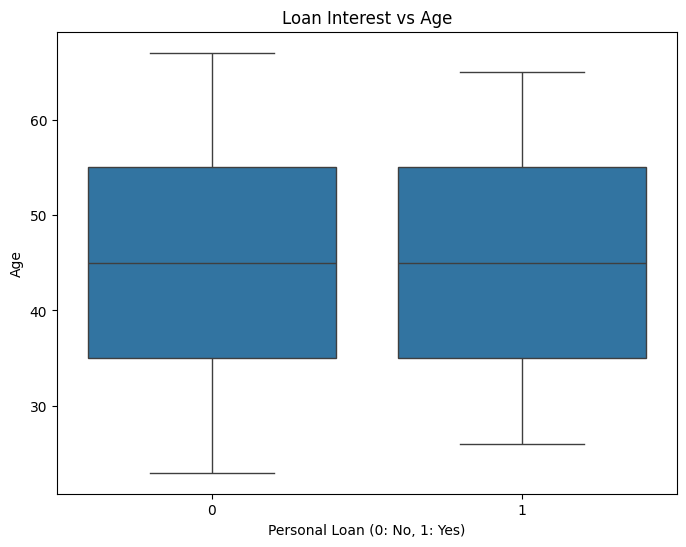

In [169]:
# Question 4: Interest in loans vs. Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title('Loan Interest vs Age')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

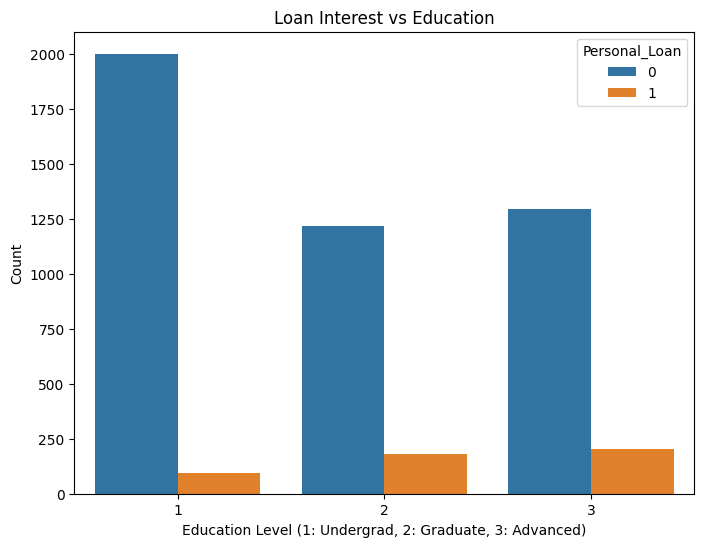

In [170]:
# Question 5: Loan interest vs Education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title('Loan Interest vs Education')
plt.xlabel('Education Level (1: Undergrad, 2: Graduate, 3: Advanced)')
plt.ylabel('Count')
plt.show()

In [171]:
# Data Preprocessing
# Dropping the ID and ZIP Code columns as they are not informative
data.drop(['ID'], axis=1, inplace=True)

In [172]:
# Checking for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


Recommendation Note: Best Practices for Machine Learning Projects

The following recommendations outline approaches that should enhance model performance, prevent common pitfalls, and improve overall efficiency:



  1.  Cross-Validation
    Use k-fold or stratified k-fold cross-validation to assess model performance comprehensively. Stratified methods are particularly important when working with imbalanced datasets to maintain the class distribution across folds.

  2.  Metrics for Imbalanced Classes
    Evaluate models using metrics that provide meaningful insights for imbalanced datasets:
    AUC-ROC: For understanding the trade-off between sensitivity and specificity.
    Precision-Recall Curve: For identifying models that balance false positives and false negatives effectively.
    F1-score: For balancing precision and recall where both are critical.

  3.  Data Leakage Prevention
    Ensure preprocessing and transformations are applied solely on training data to prevent information from the test set influencing model training. This includes scaling, encoding, and balancing techniques to maintain model integrity.

  4.  Feature Selection
    Reassess feature relevance after initial model evaluation to eliminate redundancies. Use methods like Recursive Feature Elimination (RFE) or SHAP values for data-driven insights and integrate domain knowledge to prioritize impactful features.


In [173]:
# Handle negative values in Experience by replace negative values with the median
median_experience = data['Experience'][data['Experience'] >= 0].median()
data['Experience'] = data['Experience'].apply(lambda x: x if x >= 0 else median_experience)

In [174]:
# Retaining for analysis, decided to encode ZIPCode
from sklearn.preprocessing import LabelEncoder
data['ZIPCode'] = LabelEncoder().fit_transform(data['ZIPCode'])

In [175]:
# Feature Engineering for Normalize/Scale Numeric features by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Income', 'CCAvg', 'Mortgage']] = scaler.fit_transform(data[['Income', 'CCAvg', 'Mortgage']])

In [176]:
# Feature Engineering for Interactive features Income_per_Family
data['Income_per_Family'] = data['Income'] / (data['Family'] + 1e-9)

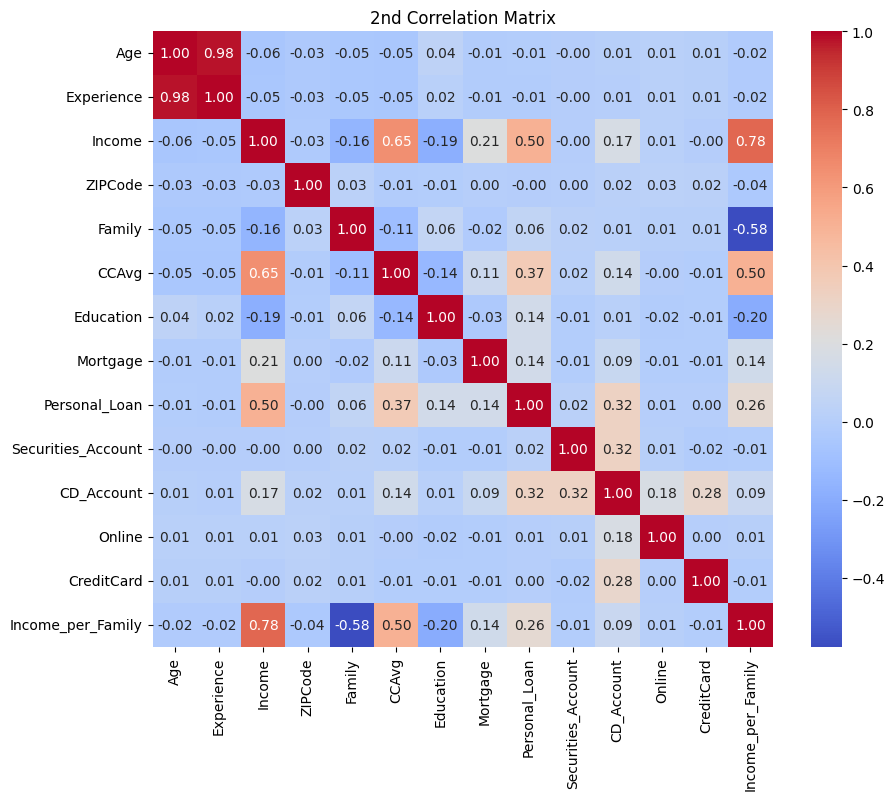

In [177]:
# Review Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('2nd Correlation Matrix')
plt.show()

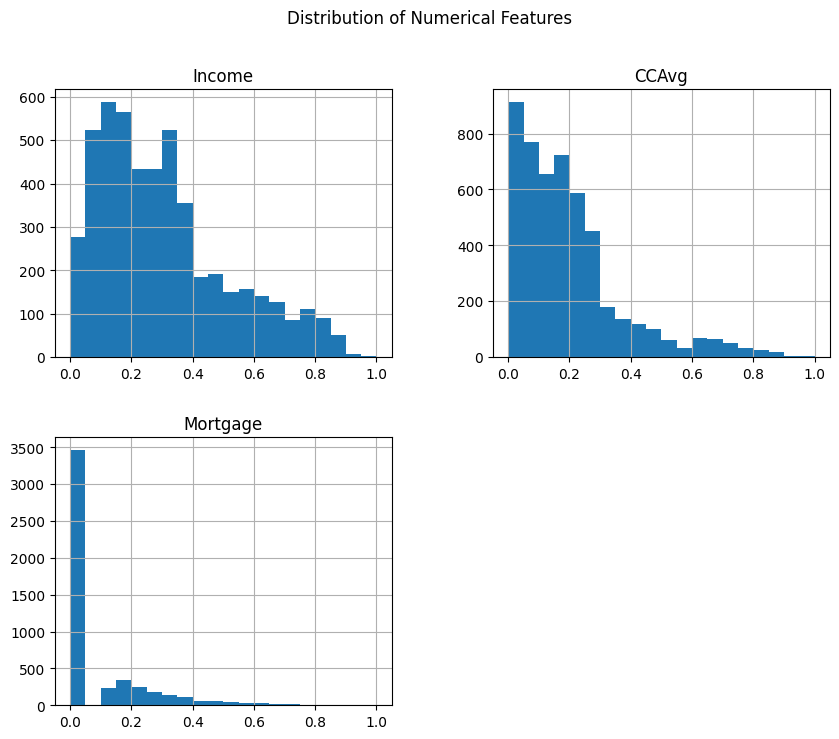

In [178]:
# Visualize Distributions
data[['Income', 'CCAvg', 'Mortgage']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

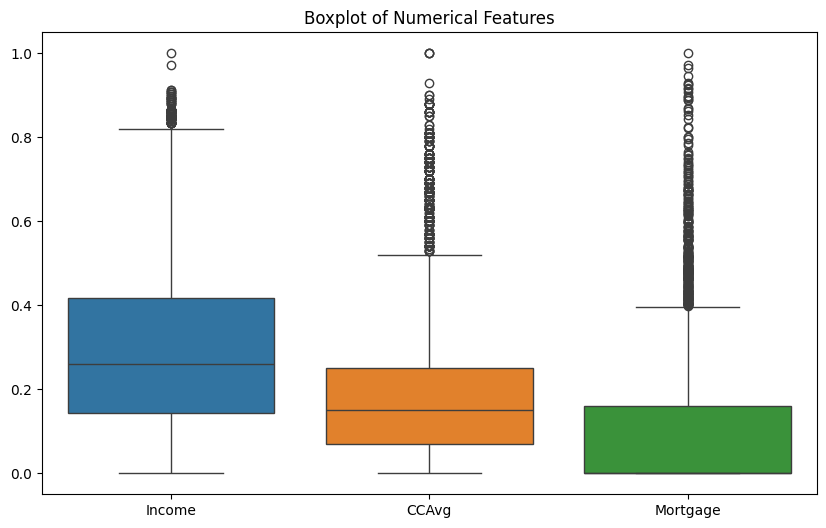

In [179]:
# Boxplot for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Income', 'CCAvg', 'Mortgage']])
plt.title('Boxplot of Numerical Features')
plt.show()

In [180]:
# Encoding categorical variables if any (Education already numeric)
# No further encoding required

## Model Building

In [181]:
# Model Building
# Defining features and target variable
X = data.drop(['Personal_Loan'], axis=1)
y = data['Personal_Loan']

In [182]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [183]:
# Feature Importance Analysis Pre-Pruning via RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

               Feature  Importance
2               Income    0.261351
6            Education    0.185276
5                CCAvg    0.140359
12   Income_per_Family    0.126207
4               Family    0.099906
9           CD_Account    0.041614
7             Mortgage    0.035561
0                  Age    0.032293
1           Experience    0.031607
3              ZIPCode    0.027736
11          CreditCard    0.007697
10              Online    0.006638
8   Securities_Account    0.003754


In [184]:
# Initial Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation Criterion

In [185]:
# Evaluate the model
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.92      0.92       157

    accuracy                           0.98      1500
   macro avg       0.95      0.96      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
 [[1329   14]
 [  12  145]]
Accuracy Score: 0.9826666666666667


*


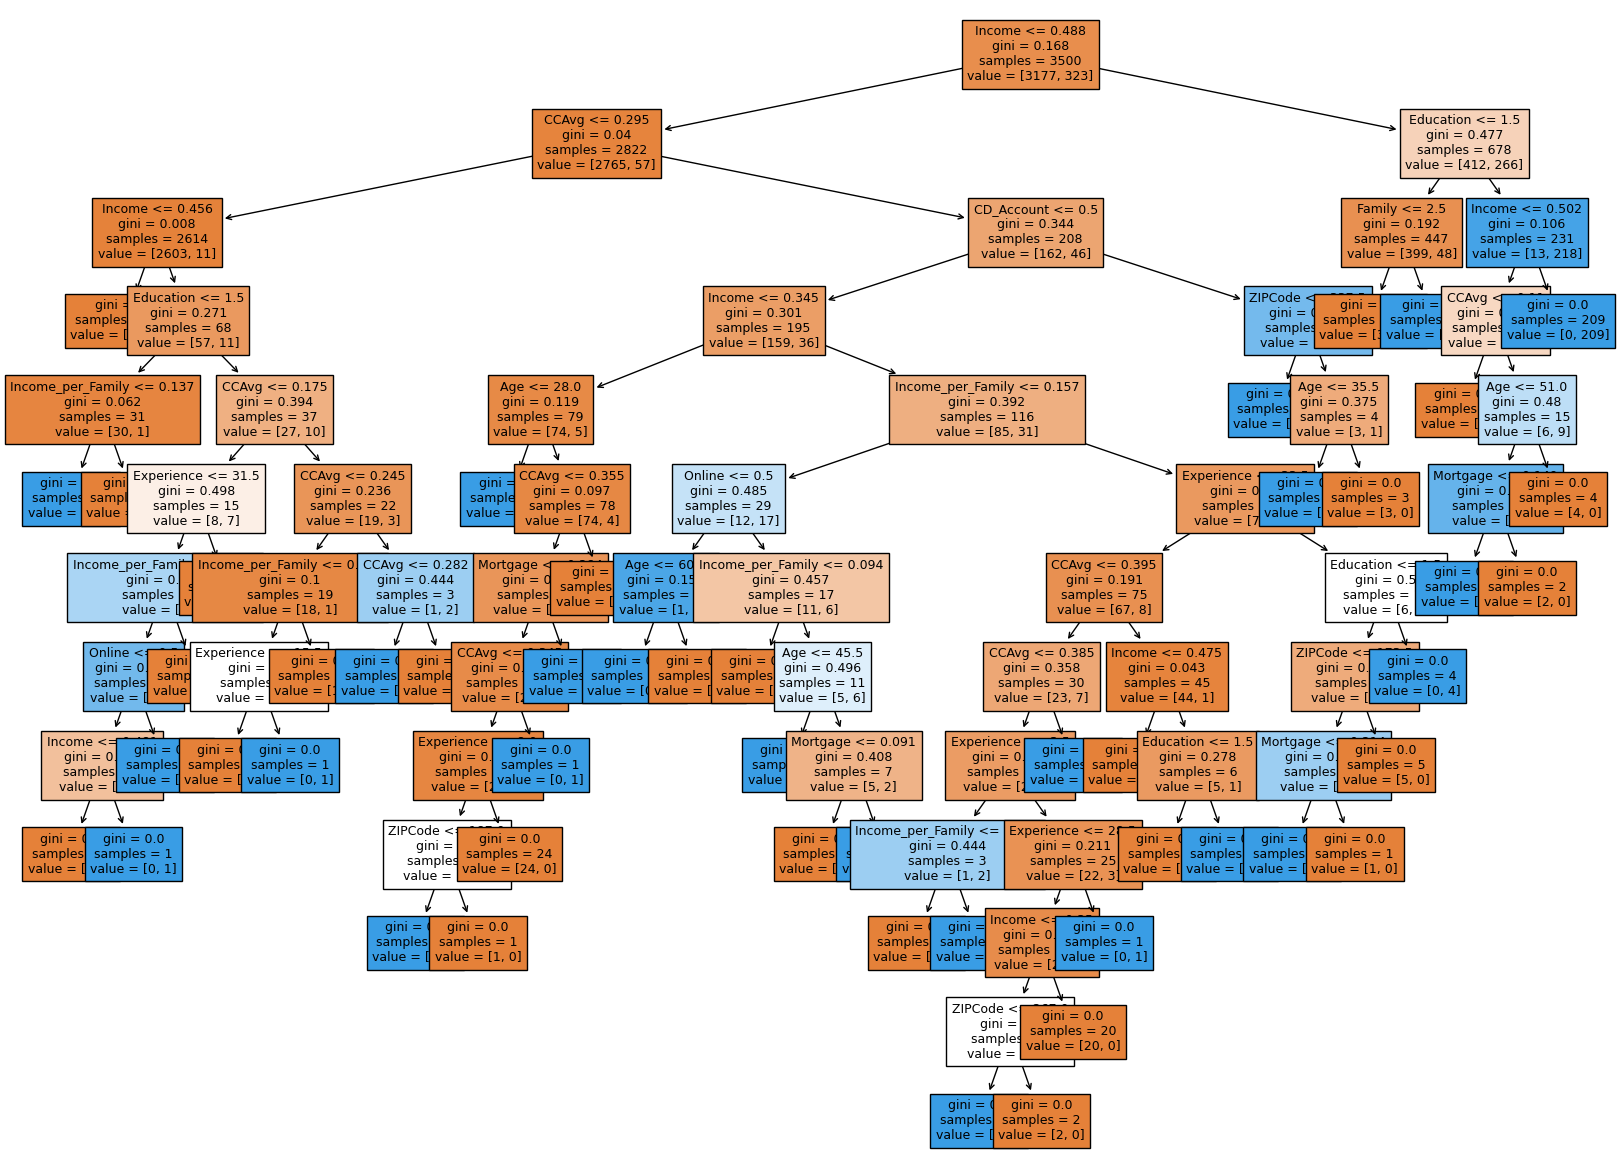

In [186]:
# Visualize the decision tree
plt.figure(figsize=(20, 15))
out = plot_tree(clf, feature_names=X.columns, filled=True, fontsize=9, node_ids=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


### Model Building

## Model Performance Improvement

In [187]:
# Target Balancing via SMOTE (Oversampling)
from imblearn.over_sampling import SMOTE
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [188]:
# Undersampling via RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [189]:
# Improving Model Performance (Pruning)
# Pre-pruning with max_depth and min_samples_split
pruned_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)
pruned_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)

## Model Performance Comparison and Final Model Selection

In [190]:
# Evaluate the pruned model
y_pruned_pred = pruned_clf.predict(X_test)
print("\nPruned Model Classification Report:\n", classification_report(y_test, y_pruned_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pruned_pred))
print("Accuracy Score (Pruned):", accuracy_score(y_test, y_pruned_pred))



Pruned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.93      0.91      0.92       157

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.96      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
 [[1333   10]
 [  14  143]]
Accuracy Score (Pruned): 0.984


## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

In [191]:
# Actionable Insights & Recommendations
# Feature importance Post-Pruning
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': pruned_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Recommendations to the Marketing Team
print("""
Recommendations:
1. Focus on customers with high income and high credit card spending.
2. Target customers with advanced education levels as they show higher loan acceptance rates.
3. Design campaigns tailored to family size and age groups most likely to accept loans.
4. Prioritize online banking users for personalized offers.
""")


Feature Importance:
                Feature  Importance
6            Education    0.421953
2               Income    0.338959
4               Family    0.168204
5                CCAvg    0.035599
9           CD_Account    0.016353
12   Income_per_Family    0.015444
0                  Age    0.003489
1           Experience    0.000000
3              ZIPCode    0.000000
7             Mortgage    0.000000
8   Securities_Account    0.000000
10              Online    0.000000
11          CreditCard    0.000000

Recommendations:
1. Focus on customers with high income and high credit card spending.
2. Target customers with advanced education levels as they show higher loan acceptance rates.
3. Design campaigns tailored to family size and age groups most likely to accept loans.
4. Prioritize online banking users for personalized offers.

